# IRIS

Esta es quizás la base de datos más conocida que se encuentra en la literatura de reconocimiento de patrones. El artículo de Fisher es un clásico en el campo y se hace referencia con frecuencia hasta el día de hoy.Este conjunto de datos consta de 3 tipos diferentes de longitud de pétalos y sépalos de iris (Setosa, Versicolor y Virginica). El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. Una clase es linealmente separable de las otras 2; estos últimos NO son linealmente separables entre sí.


<img src="/work/Iris-Dataset-Classification.png" alt="Iris">

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Carga de Datos y creación del DataFrame

In [ ]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
data= pd.DataFrame(data=iris.data, columns= iris.feature_names)
target =pd.DataFrame(data=iris.target, columns =['species'])
data= pd.concat([data, target],axis=1)
data= data.sample(frac=1, random_state=1234)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


### Separamos el conjunto de datos en Entrenamiento y Prueba

El conjunto de datos se van a separar en 80/20 por ciento de entrenamiento/prueba.

In [ ]:
Ntrain= int(data.shape[0]*0.8)
train = data.iloc[:Ntrain,:]
test=data.iloc[Ntrain:,:]

In [ ]:
print('Los datos para entrenar el modelo consta de: ',train.shape)
print('Los datos para prueba el modelo consta de : ',test.shape)

Los datos para entrenar el modelo consta de:  (120, 5)
Los datos para prueba el modelo consta de :  (30, 5)


In [ ]:
test.shape

(30, 5)

### Comparando el largo contra el ancho del Pétalo

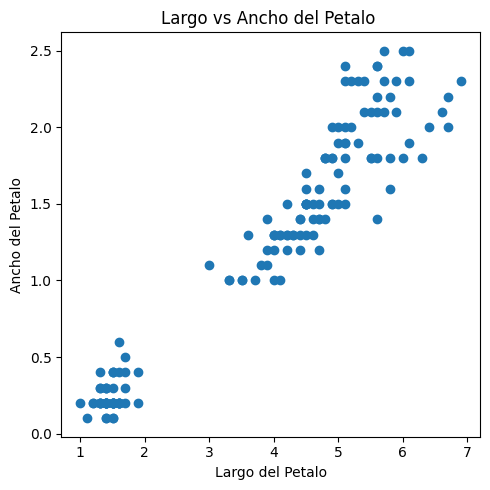

In [ ]:
f= plt.figure(figsize=(5,5))
ax= f.add_subplot(1,1,1)
ax.scatter(data['petal length (cm)'], data['petal width (cm)'])
ax.set_xlabel('Largo del Petalo')
ax.set_ylabel('Ancho del Petalo')
ax.set_title('Largo vs Ancho del Petalo ')
f.tight_layout()

### Creando el modelo de Regresión Lineal

In [ ]:
model_1 = linear_model.LinearRegression()
model_1.fit(pd.DataFrame(train.iloc[:,2]),train.iloc[:,3])
print('Coef\n',model_1.coef_)
print('\n \nBias \n',model_1.intercept_)

Coef
 [0.41490802]

 
Bias 
 -0.357589314248546


El resultado nos indica que la relacion con el largo del petalo, es 0,41 y que el bias (tambien llamado interceptar) es -0,36.
En la gráfica anterior $x$ es el Petal Lenght y $y$ es el Petal Width. Queremos ajustar un modelo a la forma
$\theta_1*x + \theta_0 = y$, la ecuación de la recta para generar nuestra regresión lineal.

Quedando de la siguiente manera:
$\theta_1 * x + \theta_0 = 0.41*x - 0.36 = y$ <br>




### Graficamos la regresión Lineal

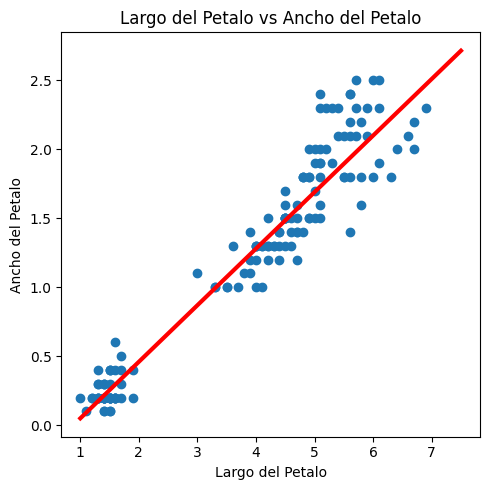

In [ ]:
#definimos un arreglo desde el valor minimo del largo del petalo hasta el maximo +1, en pasos de 0.5
xvals= np.arange(data['petal length (cm)'].min(),data['petal length (cm)'].max()+1,0.5) 
yvals= 0.41*xvals - 0.36
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(data['petal length (cm)'],data['petal width (cm)'])
ax.plot(xvals,yvals,linewidth = 3,color= 'r')
ax.set_xlabel('Largo del Petalo')
ax.set_ylabel('Ancho del Petalo')
ax.set_title('Largo del Petalo vs Ancho del Petalo')
f.tight_layout()

### Rendimiento

Para cuantificar el rendimiento se utilizan dos metricas: el error cuadrático medio (MSE) y $R^2$.
El valor de $R^2$ busca la correlación entre $x$ y $y$. Siempre queremos un MSE bajo y $R^2$ cercano a 1. $R^2$ está limitado de $0$ (efectivamente no correlacionado) a $1$ (relación perfecta).

In [ ]:
ypredict = model_1.predict(pd.DataFrame(test.iloc[:,2]))
print('MSE: %.4f'
    % mean_squared_error(pd.DataFrame(test.iloc[:,3]),ypredict))
print('R2:%.4f'
    %r2_score(pd.DataFrame(test.iloc[:,3]),ypredict))

MSE: 0.0431
R2:0.9368


Con estos datos de (MSE) y $R^2$ podemos concluir que existe una relacion entre la longitud y el ancho de los pétalos.

### Regresion Logistica

In [ ]:
#Preparamos los datos de entrenamieto y prueba, configuramos la regresion logistica y ajustamos el modelo.

xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,-1]
xtest = test.iloc[:,:-1]
ytest = test.iloc[:,-1]

model_2 = linear_model.LogisticRegression(max_iter=110)
model_2.fit(xtrain,ytrain)

LogisticRegression(max_iter=110)

In [ ]:
#Realizamos las predicciones con el conjunto de pruebas y probamos su precisión.
ypred = model_2.predict(xtest)
print('Prueba de precisión:', accuracy_score(ytest,ypred))

Prueba de precisión: 1.0


Se obtuvieron todos los ejemplos correctamente, esto quiere decir que se agruparon en las diferentes clases. A continuacion crearemos una matriz de confusion para verificar que esto sea verdad. 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

### Random Forest

Random Forest es un estimador que ajusta una serie de clasificadores de arboles de decisión, que combina la salida de multiples arboles de decisión para llegar a un resultado unico.

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print('Prueba de precisión:',accuracy_score(ytest, ypred))

Prueba de precisión: 1.0


### K-Means Clustering

K-Means es un algoritmo de aprendizaje no supervisado, por lo que no requiere de etiquetas para entrenar.
Para simplificar , en este caso entrenaremos con `petal length` y `petal width`.

In [ ]:
k2model = KMeans(n_clusters=3, random_state=42)
k2model.fit(data[['petal length (cm)','petal width (cm)']])
print('Inertia =',k2model.inertia_)
print('Centroids (x,y)=\n',k2model.cluster_centers_)

Inertia = 31.371358974358948
Centroids (x,y)=
 [[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]


### Graficamos los centros de clusteres

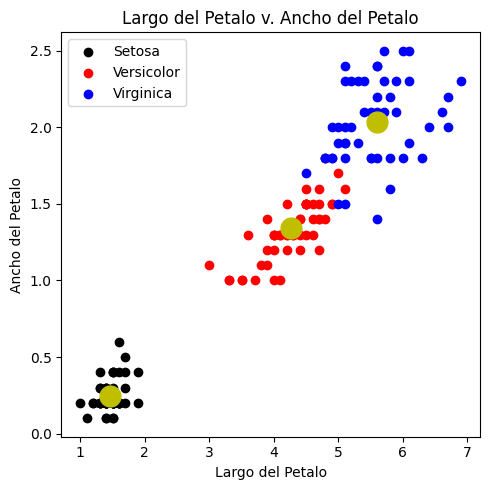

In [ ]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]['petal length (cm)'],
           data[data.iloc[:, -1]==0]['petal width (cm)'],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]['petal length (cm)'],
           data[data.iloc[:, -1]==1]['petal width (cm)'],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]['petal length (cm)'],
           data[data.iloc[:, -1]==2]['petal width (cm)'],
           c='b')

ax.legend(['Setosa', 'Versicolor', 'Virginica'])
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        'y.', markersize=30)

ax.set_xlabel('Largo del Petalo')
ax.set_ylabel('Ancho del Petalo')
ax.set_title('Largo del Petalo v. Ancho del Petalo')
f.tight_layout()


### Conclusión

En esta notebook hemos cubierto lo esencial de diferentes modelos de machine learning usando scikit-learn:
* Regresión lineal - (supervisado, regresión).
* Regresión logística - (supervisado, clasificación).
* Bosques aleatorios (Random Forest) - (supervised, clasificación).
* K-Means - (no supervisado, clustering).

Tambien logramos identificar la relación entre el Largo del Pétalo y el Ancho del Pétalo de cada especie.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=540b7abf-4943-433f-9a6a-5f7077c14cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>